In [12]:
import os 
import json

from tqdm.notebook import tqdm
os.environ['LIBROSA_CACHE_DIR'] = '/tmp/librosa_cache'
import librosa
import soundfile

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [13]:
audio_files = [
 a.replace("~", "/home/caiwan") for a in [
     "~/test_L.flac", 
     "~/test_R.flac",
     "~/prog/audioarchive/docker/data/A1/211009_0001.wav"
     ]
]

In [14]:
def gen_spectral_data(infile, block_length = 128, frame_length = 4096, hop_length = None, fft_length = 512, duration=None):

    hop_length = hop_length if hop_length else frame_length
    # sample_rate = librosa.get_samplerate(infile)

    for block in librosa.stream(infile, block_length=block_length, frame_length=frame_length ,hop_length=hop_length, duration=duration):
        yield block, librosa.amplitude_to_db(np.abs(librosa.stft(block, n_fft=fft_length, hop_length=hop_length)),ref=np.max)

infile=audio_files[2]

sample_rate = librosa.get_samplerate(infile)
spectrum_data = list([s for s in tqdm(gen_spectral_data(infile,duration=32*60))])

0it [00:00, ?it/s]

In [15]:
# in_data = spectrum_data[0]
# print(len(spectrum_data), in_data.shape, in_data.size)

In [16]:
class NumpyArrayEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

# with open("f.json", "w") as f:
#     json.dump(spectrum_data, f, cls=NumpyArrayEncoder)

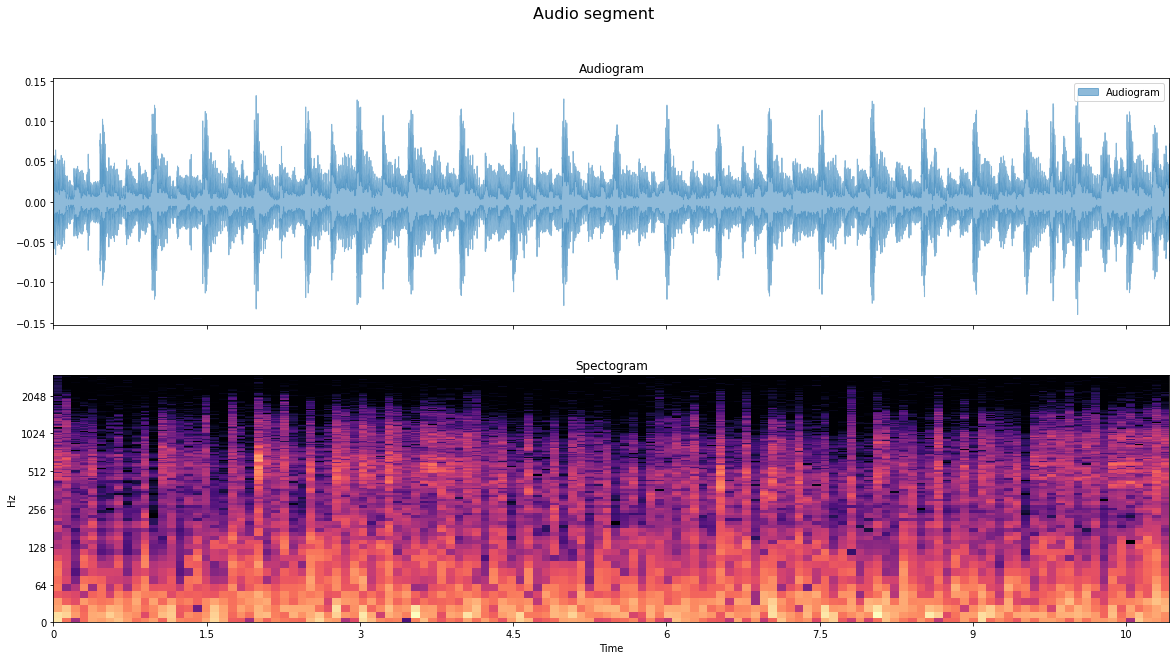

In [17]:
# https://librosa.org/doc/

def plot(audio, spectrum):
    # for index, ((audio, _), sampe_rate, filename) in enumerate(audio_data):
    fig, (audiogram, spectorgram) = plt.subplots(figsize=(20,10), nrows=2, sharex=True)
    fig.suptitle(f"Audio segment", fontsize=16)

    audio_length = audio.size / sample_rate

    librosa.display.waveshow(audio, sr=sample_rate, ax=audiogram, x_axis="time", label="Audiogram", alpha=0.5)
    audiogram.set(title="Audiogram")
    audiogram.set(xlim=(0,audio_length))
    audiogram.label_outer()
    audiogram.legend()

    img = librosa.display.specshow(spectrum, sr=sample_rate/8, ax=spectorgram, y_axis="log", x_axis="time")
    spectorgram.set(title="Spectogram")
    spectorgram.set(xlim=(0,audio.size / sample_rate))

    # S, phase = librosa.magphase(librosa.stft(audio))
    # rms = librosa.feature.rms(S=S)

    # times = librosa.times_like(rms)
    # rms_energy = audiogram.twinx()
    # rms_energy.semilogy(times, rms[0], label='RMS Energy', color="orange", alpha=0.7)
    # rms_energy.legend()
    # rms_energy.label_outer()

    plt.show(fig)

plot(*spectrum_data[4])


In [18]:
# librosa.output.write_wav('test.wav', spectrum_data[4][0])
soundfile.write('test.wav', spectrum_data[4][0], sample_rate)

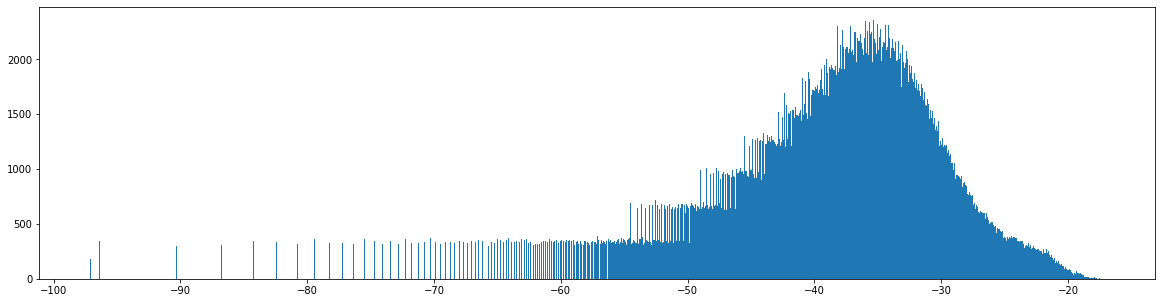

In [19]:
# for index, ((audio, _), sampe_rate, filename) in enumerate(audio_data):
    
def plot_histogram(audio):
    fig, histogram = plt.subplots(figsize=(20,5), nrows=1, sharex=True)
    data = librosa.amplitude_to_db(np.abs(audio))
    histogram.hist(data, bins=1024)

    plt.show(fig)

plot_histogram(spectrum_data[4][0])

IndexError: list index out of range

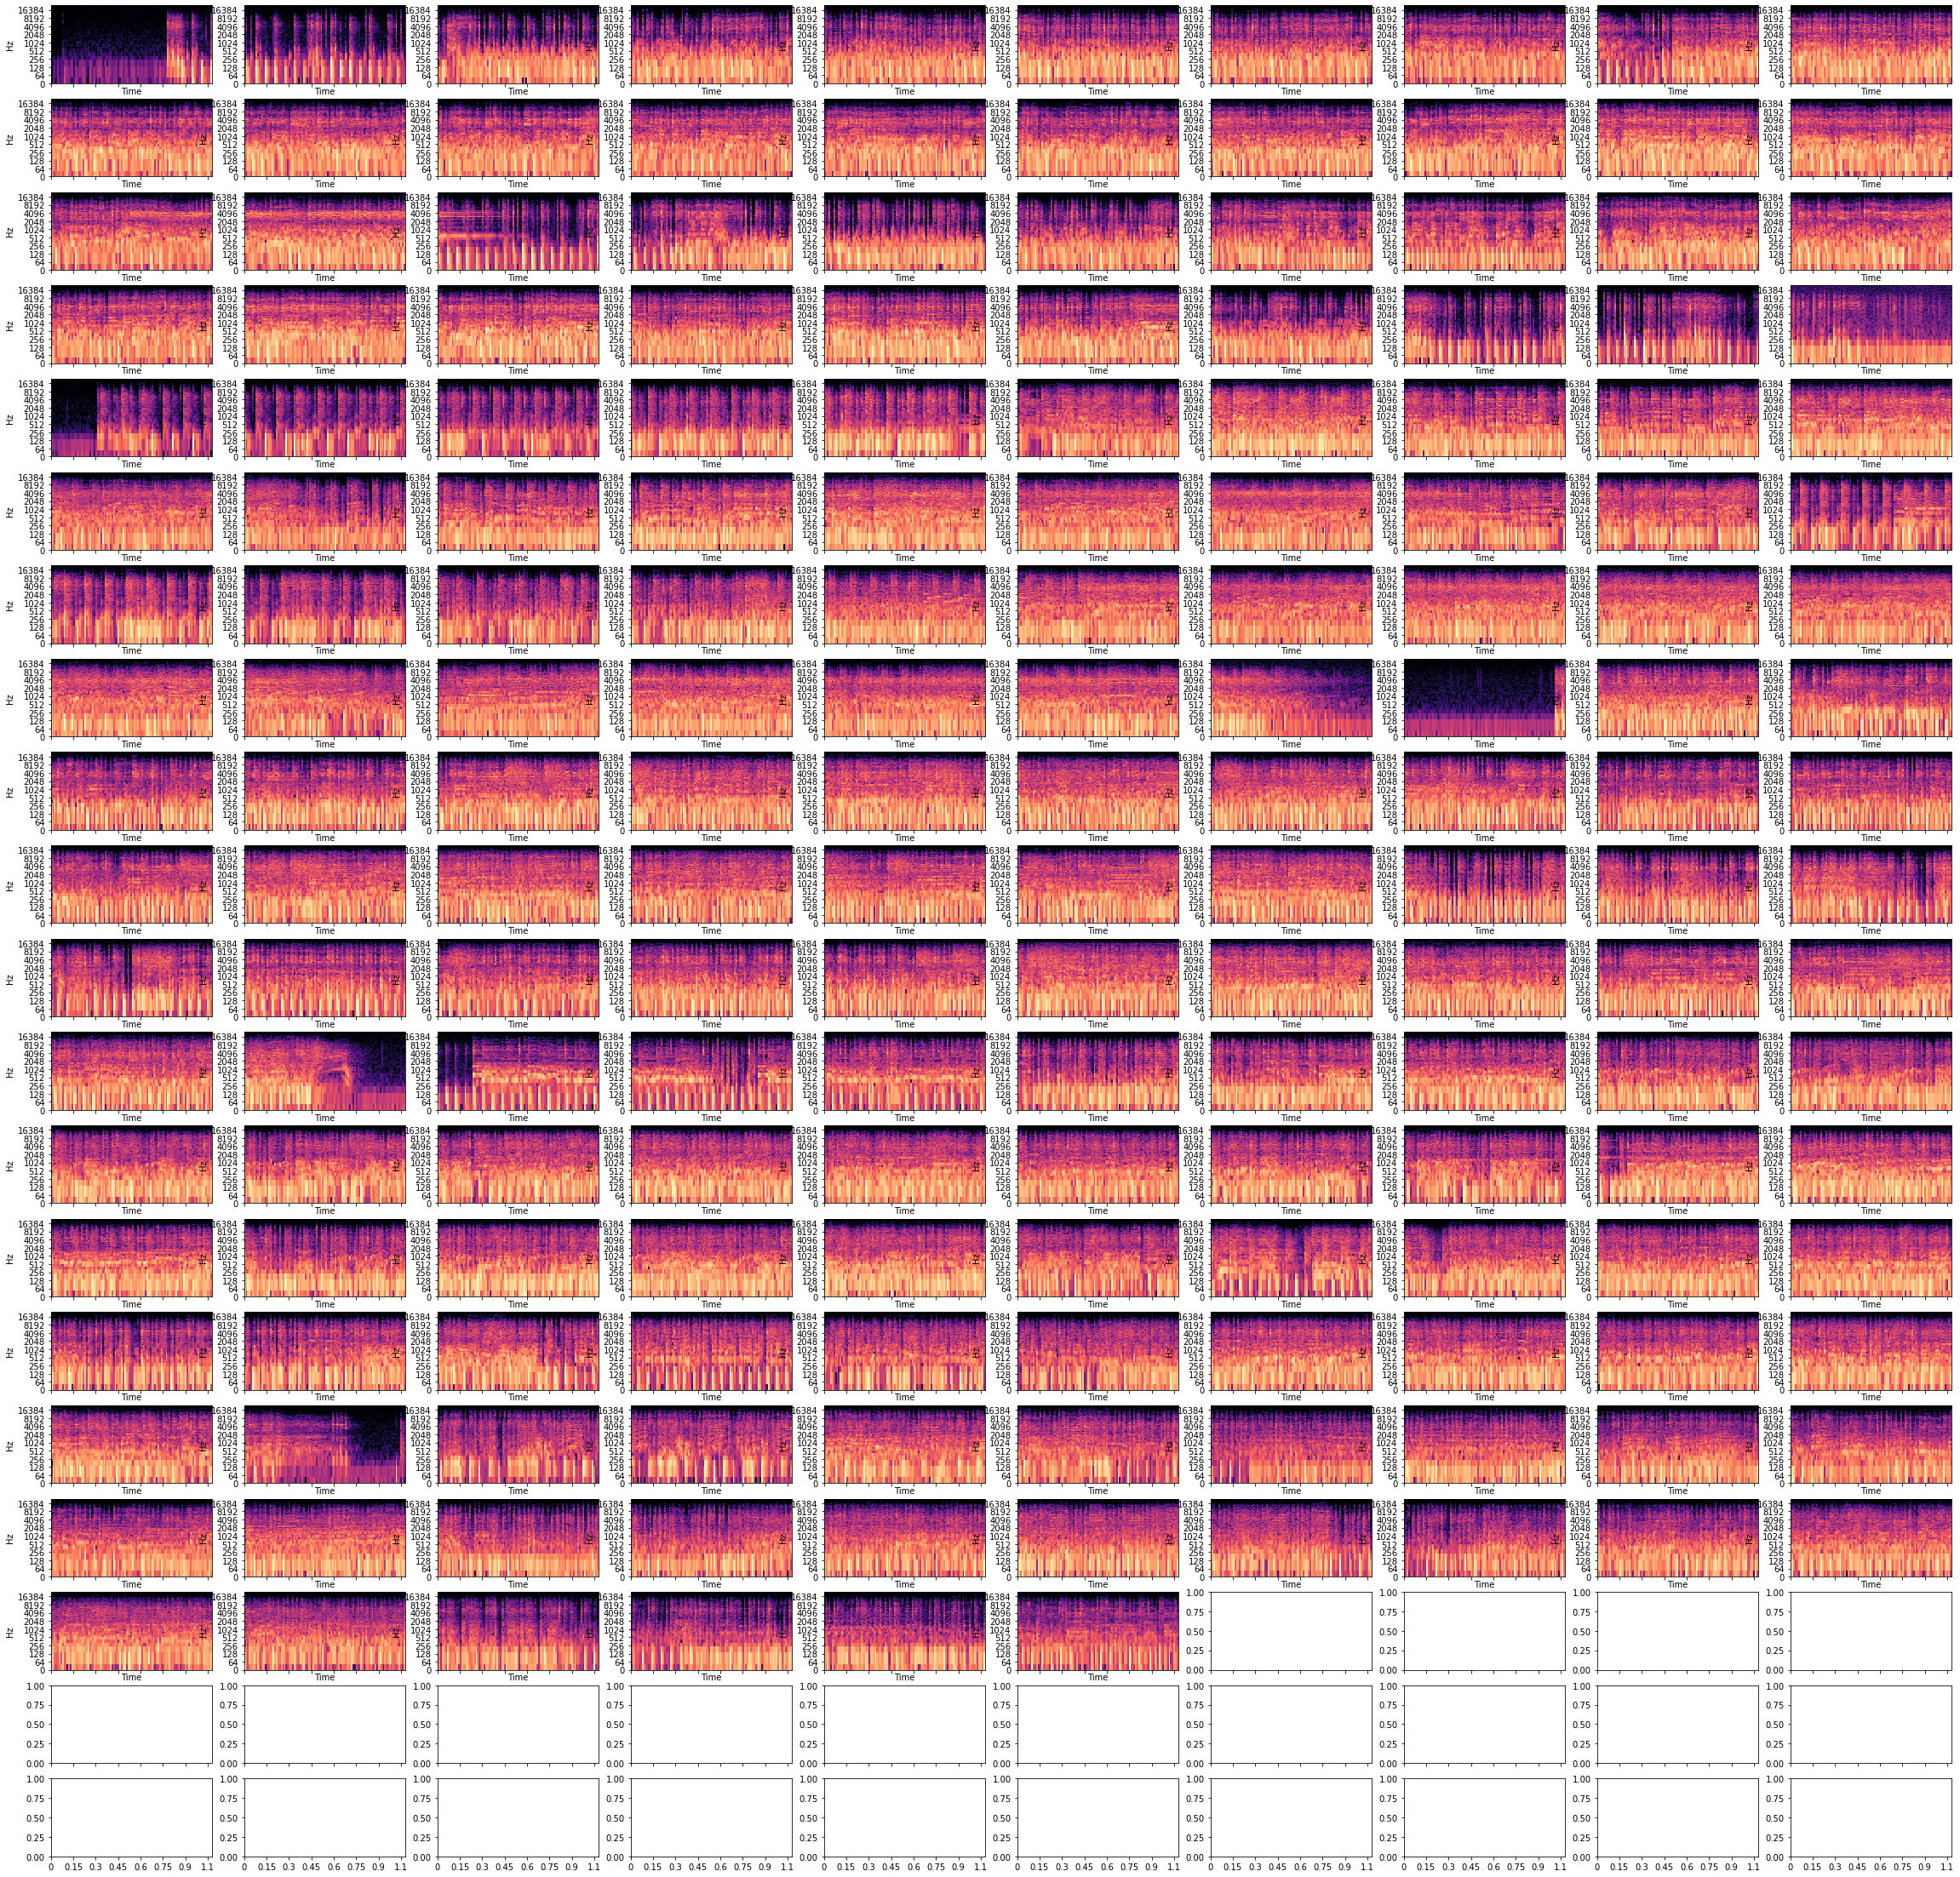

In [20]:
fig, spectorgram_figs = plt.subplots(figsize=(40,40), nrows=20, ncols=10, sharex=True)

def bazdmeg(fasz):
    for pina in fasz:
        for geci in pina:
            yield geci

for index, spectorgram_fig in enumerate(bazdmeg(spectorgram_figs)):
    _, in_data = spectrum_data[index]
    img = librosa.display.specshow(in_data, sr=sample_rate, ax=spectorgram_fig, x_axis="time", y_axis="log")

fig.show()

In [ ]:
# https://librosa.org/doc/

def save_plot(audio, spectrum, filename, size=64):
    # for index, ((audio, _), sampe_rate, filename) in enumerate(audio_data):
    fig, spectorgram = plt.subplots(figsize=(.1*size, .1*size), dpi=100, sharex=True)
    
    librosa.display.specshow(spectrum, sr=sample_rate/8, ax=spectorgram, y_axis="log", x_axis="time")

    spectorgram.set(xlim=(0,audio.size / sample_rate))

    spectorgram.set_axis_off()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=10)
    plt.close()


In [21]:
for index, (audio, spectrum) in tqdm(enumerate(spectrum_data)):
    save_plot(audio, spectrum, f"test/test_{index}.png", size=92)

0it [00:00, ?it/s]